Importing and checking the data.

In [15]:
import pandas as pd
import numpy as np
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

cancer_data = pd.read_csv("/kaggle/input/cancer-data/Cancer_Data.csv")
cancer_data.head()

/kaggle/input/cancer-data/Cancer_Data.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [16]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [17]:
cancer_data.duplicated().sum()

0

In [18]:
cancer_data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [19]:
cancer_data.drop(columns='Unnamed: 32', inplace=True)

In [22]:
cancer_data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Checking the shape of the variables.

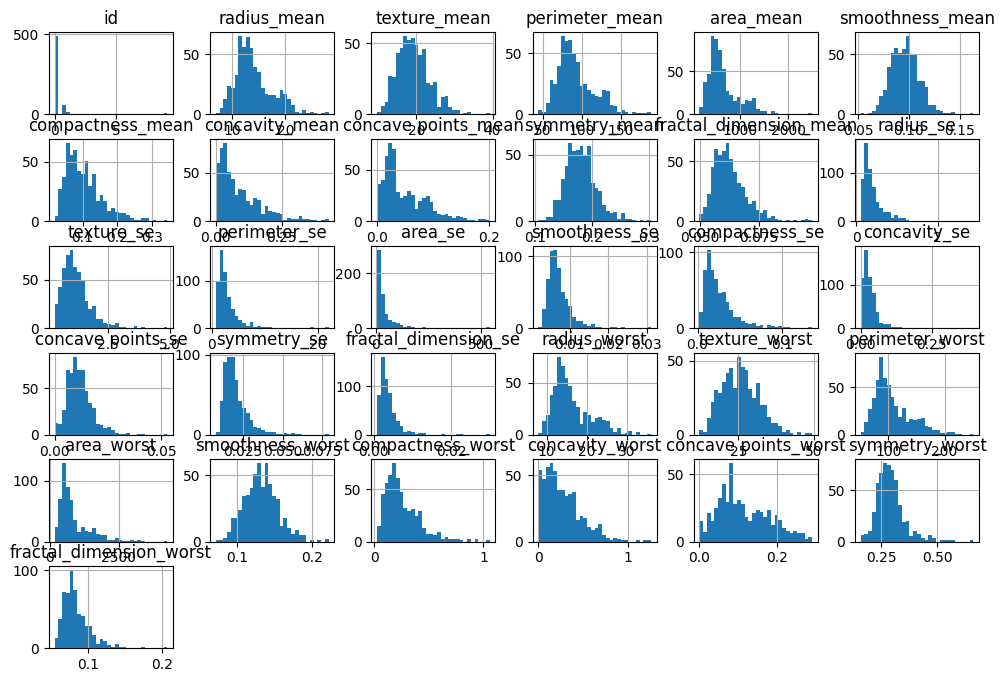

In [20]:
import matplotlib.pyplot as plt

cancer_data.hist(bins=30, figsize=(12,8))
plt.show()

Splitting the data into a stratified test and train set.

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

y = cancer_data["diagnosis"]
X = cancer_data.drop(columns=["id", "diagnosis"])

# Performing the stratification split
for train_index, test_index in sss.split(X, y):
    train_set, test_set = X.iloc[train_index], X.iloc[test_index]
    train_tgt, test_tgt = y.iloc[train_index], y.iloc[test_index]

Transforming the features to make them closer to a Gaussian distribution by using the 10th root, since most of them are right skewed.

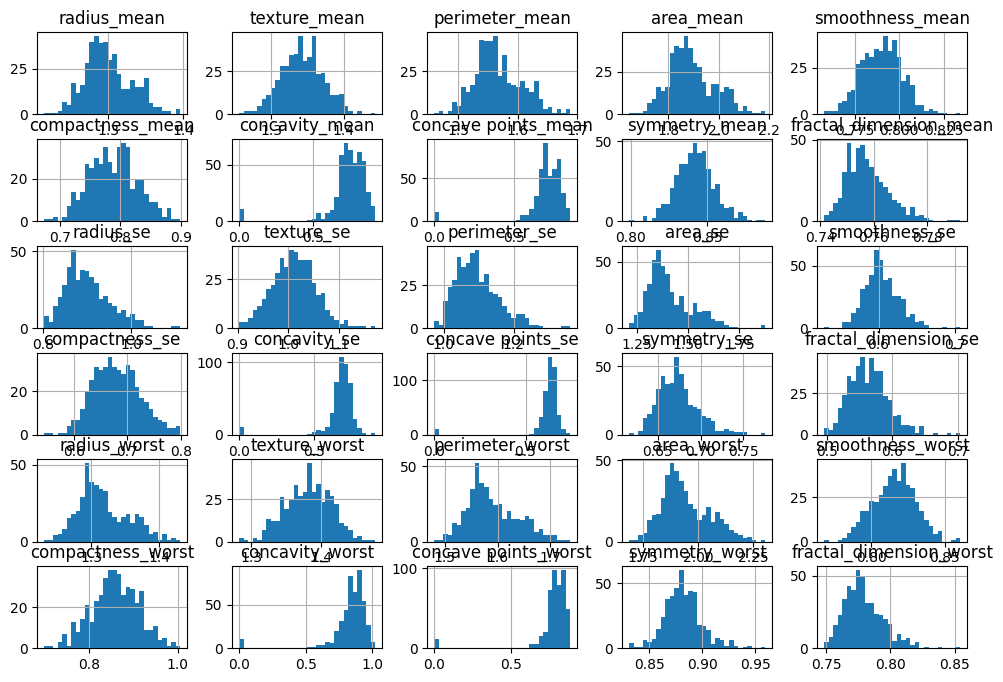

In [25]:
from sklearn.preprocessing import FunctionTransformer


root_transformer = FunctionTransformer(lambda x: np.power(x, 1/10), 
                                      inverse_func = lambda x: np.power(x, 10))
root_train_set = root_transformer.transform(train_set)

root_train_set.hist(bins=30, figsize=(12,8))
plt.show()

Scaling the data by standardizing it.

In [26]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
scaled_train_set = std_scaler.fit_transform(root_train_set)

Creating a pipeline with all the preprocessing.

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

attribs = train_set.columns.tolist()

transformation = make_pipeline(
    SimpleImputer(strategy="median"),  
    FunctionTransformer(lambda x: np.power(x, 1/10), 
                        inverse_func = lambda x: np.power(x, 10)),
    StandardScaler())
preprocessing = ColumnTransformer([("predictors", transformation, attribs)])

training_prepared = preprocessing.fit_transform(train_set)
training_prepared_df = pd.DataFrame(training_prepared, columns=attribs)
training_prepared_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.625472,0.928694,0.543799,0.625433,-0.991446,-0.647716,-0.195422,0.070182,-1.077212,-0.851822,...,0.708528,1.261816,0.609227,0.735078,-0.546777,-0.535348,-0.058368,0.138899,0.151822,0.116765
1,-0.465947,-1.913656,-0.494981,-0.483004,0.533893,-0.559388,-0.098229,0.131034,0.581985,-0.437615,...,-0.549921,-1.987381,-0.586406,-0.577663,0.347343,-0.850401,-0.144428,0.102699,-0.055289,-0.997033
2,-0.292821,0.539203,-0.312914,-0.276671,-1.545917,-0.217579,0.129093,-0.245347,-0.856143,-0.190321,...,-0.322293,0.283093,-0.412317,-0.297863,-1.801793,-0.183913,0.067494,-0.198616,-0.681197,-0.067063
3,0.321391,0.784252,0.520468,0.307448,0.308838,1.820299,1.001295,0.707743,0.859788,0.950335,...,0.129949,0.370810,0.653509,0.149817,0.484687,2.037479,1.018091,0.711443,0.012323,1.727733
4,1.261259,0.290968,1.238967,1.299679,-0.047189,0.277844,0.631698,0.566398,-0.381749,-0.848547,...,1.092116,0.322453,1.033147,1.105078,0.152402,-0.040033,0.425155,0.385318,-0.976808,-0.539623


We will use as the model a SVM since it is a classification task of a small dataset.

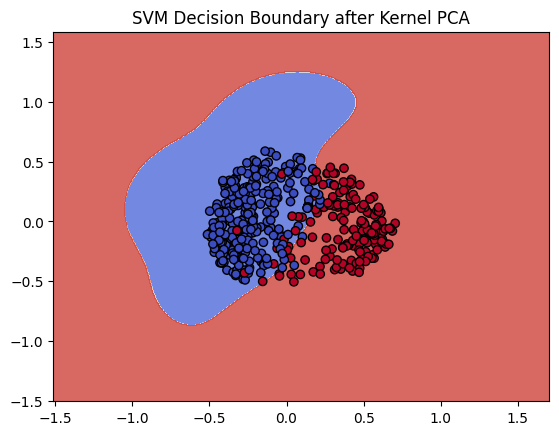

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import KernelPCA

# Apply Kernel PCA
kpca = KernelPCA(kernel="rbf", n_components=2)
X_kpca = kpca.fit_transform(training_prepared_df)

# Encode labels to the target variable
label_encoder = LabelEncoder()
train_tgt_encoded = label_encoder.fit_transform(train_tgt)

# Train the SVM model on the transformed data
model_kpca = svm.SVC(kernel="rbf", C=10)
model_kpca.fit(X_kpca, train_tgt_encoded)

# Visualize the decision boundaries on the transformed data
xx, yy = np.meshgrid(np.linspace(X_kpca[:, 0].min() - 1, X_kpca[:, 0].max() + 1, 500),
                     np.linspace(X_kpca[:, 1].min() - 1, X_kpca[:, 1].max() + 1, 500))
Z = model_kpca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=train_tgt_encoded, 
            edgecolors='k', cmap='coolwarm')
plt.title('SVM Decision Boundary after Kernel PCA')
plt.show()


In [36]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

first_svm = svm.SVC(kernel="linear", C=1)
first_scores = cross_val_score(first_svm, training_prepared_df, train_tgt, cv=5)

print(f"Accuracy {first_scores.mean()} (+/- {first_scores.std()})")

Accuracy 0.9714285714285715 (+/- 0.011206636293610512)


In [39]:
first_svm = svm.SVC(kernel="linear", C=0.01)
first_scores = cross_val_score(first_svm, training_prepared_df, train_tgt, cv=5)

print(f"Accuracy {first_scores.mean()} (+/- {first_scores.std()})")

Accuracy 0.9670329670329672 (+/- 0.021978021978021966)


In [37]:
first_svm = svm.SVC(kernel="linear", C=0.5)
first_scores = cross_val_score(first_svm, training_prepared_df, train_tgt, cv=5)

print(f"Accuracy {first_scores.mean()} (+/- {first_scores.std()})")

Accuracy 0.9648351648351647 (+/- 0.008223422828074567)


In [38]:
first_svm = svm.SVC(kernel="linear", C=3)
first_scores = cross_val_score(first_svm, training_prepared_df, train_tgt, cv=5)

print(f"Accuracy {first_scores.mean()} (+/- {first_scores.std()})")

Accuracy 0.9626373626373628 (+/- 0.01785502946073838)


In [40]:
first_svm = svm.SVC(kernel="linear", C=1.1)
first_scores = cross_val_score(first_svm, training_prepared_df, train_tgt, cv=5)

print(f"Accuracy {first_scores.mean()} (+/- {first_scores.std()})")

Accuracy 0.9692307692307693 (+/- 0.01281527888976988)


Performing grid search to find the hyperparameters that work best.

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, recall_score

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("svm", svm.SVC()),
])

# Encoding "M" and "B" into 0 and 1 for the scoring metric
# We use recall, tp/(tp+fn), to minimize false negatives
recall_scorer = make_scorer(recall_score, pos_label="M")

# Hyperparameter combinations to try
param_grid = [
    {"svm__kernel": ["linear", "rbf", "sigmoid"],
     "svm__C": [0.1, 0.5, 1, 10, 25, 50, 100]},
    {"svm__kernel": ["poly"],
     "svm__C": [0.1, 0.5, 1, 10, 25, 40, 50, 75, 100],
     "svm__degree": [2, 3, 4, 5]},
]

# Finding the best hyperparameters with grid search
grid_search = GridSearchCV(full_pipeline, param_grid, cv=10, scoring=recall_scorer)
grid_search.fit(train_set, train_tgt)
grid_search.best_params_

{'svm__C': 10, 'svm__kernel': 'rbf'}

From the code we see that the best hyperparameters are "rbf" for the Kernel and 10 for C. We create our final model with them and test the results.

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

testing_prepared = preprocessing.fit_transform(test_set)
testing_prepared_df = pd.DataFrame(testing_prepared, columns=attribs)

final_model = svm.SVC(kernel="rbf", C=10)
final_model.fit(training_prepared_df, train_tgt)
test_predictions = final_model.predict(testing_prepared_df)

# Printing the results
print(confusion_matrix(test_tgt, test_predictions))
print(classification_report(test_tgt, test_predictions))

[[71  1]
 [ 1 41]]
              precision    recall  f1-score   support

           B       0.99      0.99      0.99        72
           M       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [41]:
testing_prepared = preprocessing.fit_transform(test_set)
testing_prepared_df = pd.DataFrame(testing_prepared, columns=attribs)

final_model = svm.SVC(kernel="rbf", C=5)
final_model.fit(training_prepared_df, train_tgt)
test_predictions = final_model.predict(testing_prepared_df)

# Printing the results
print(confusion_matrix(test_tgt, test_predictions))
print(classification_report(test_tgt, test_predictions))

[[72  0]
 [ 1 41]]
              precision    recall  f1-score   support

           B       0.99      1.00      0.99        72
           M       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [42]:
testing_prepared = preprocessing.fit_transform(test_set)
testing_prepared_df = pd.DataFrame(testing_prepared, columns=attribs)

final_model = svm.SVC(kernel="rbf", C=1)
final_model.fit(training_prepared_df, train_tgt)
test_predictions = final_model.predict(testing_prepared_df)

# Printing the results
print(confusion_matrix(test_tgt, test_predictions))
print(classification_report(test_tgt, test_predictions))

[[71  1]
 [ 1 41]]
              precision    recall  f1-score   support

           B       0.99      0.99      0.99        72
           M       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Since our model has performed well, we now try visualizing and understanding it.